<a href="https://colab.research.google.com/github/nmk1406/Knowledge-Distillation/blob/main/test_classify_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
import PIL.Image as Image

In [3]:
model = torch.load('/content/drive/MyDrive/123/cifar10-resnet20_from_densenet_bc_k12_depth100-final_run.pt')

In [5]:
classes = ['airplane',
           'automobile',
           'bird',
           'cat',
           'deer',
           'dog',
           'frog',
           'horse',
           'ship',
           'truck']

In [6]:
mean = [0.49139968, 0.48215841, 0.44653091]
std = [0.24703223, 0.24348513, 0.26158784]

img_transforms = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize(torch.Tensor(mean), torch.Tensor(std))
])

In [7]:
def classify(model, img_transforms, img_path, classes):
  model =  model.eval()
  image = Image.open(img_path)
  image.show()
  image = img_transforms(image).float()
  image = image.unsqueeze(0)

  output = model(image)
  _, predicted = torch.max(output.data, 1)
  print(classes[predicted.item()])

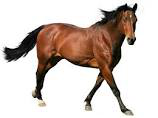

horse


In [8]:
classify(model, img_transforms, '/content/horse.jpg', classes)

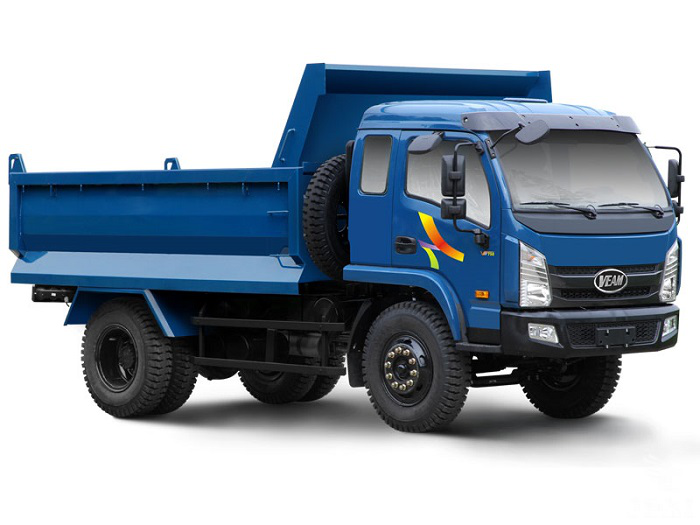

truck


In [9]:
classify(model, img_transforms, '/content/truck.jpg', classes)

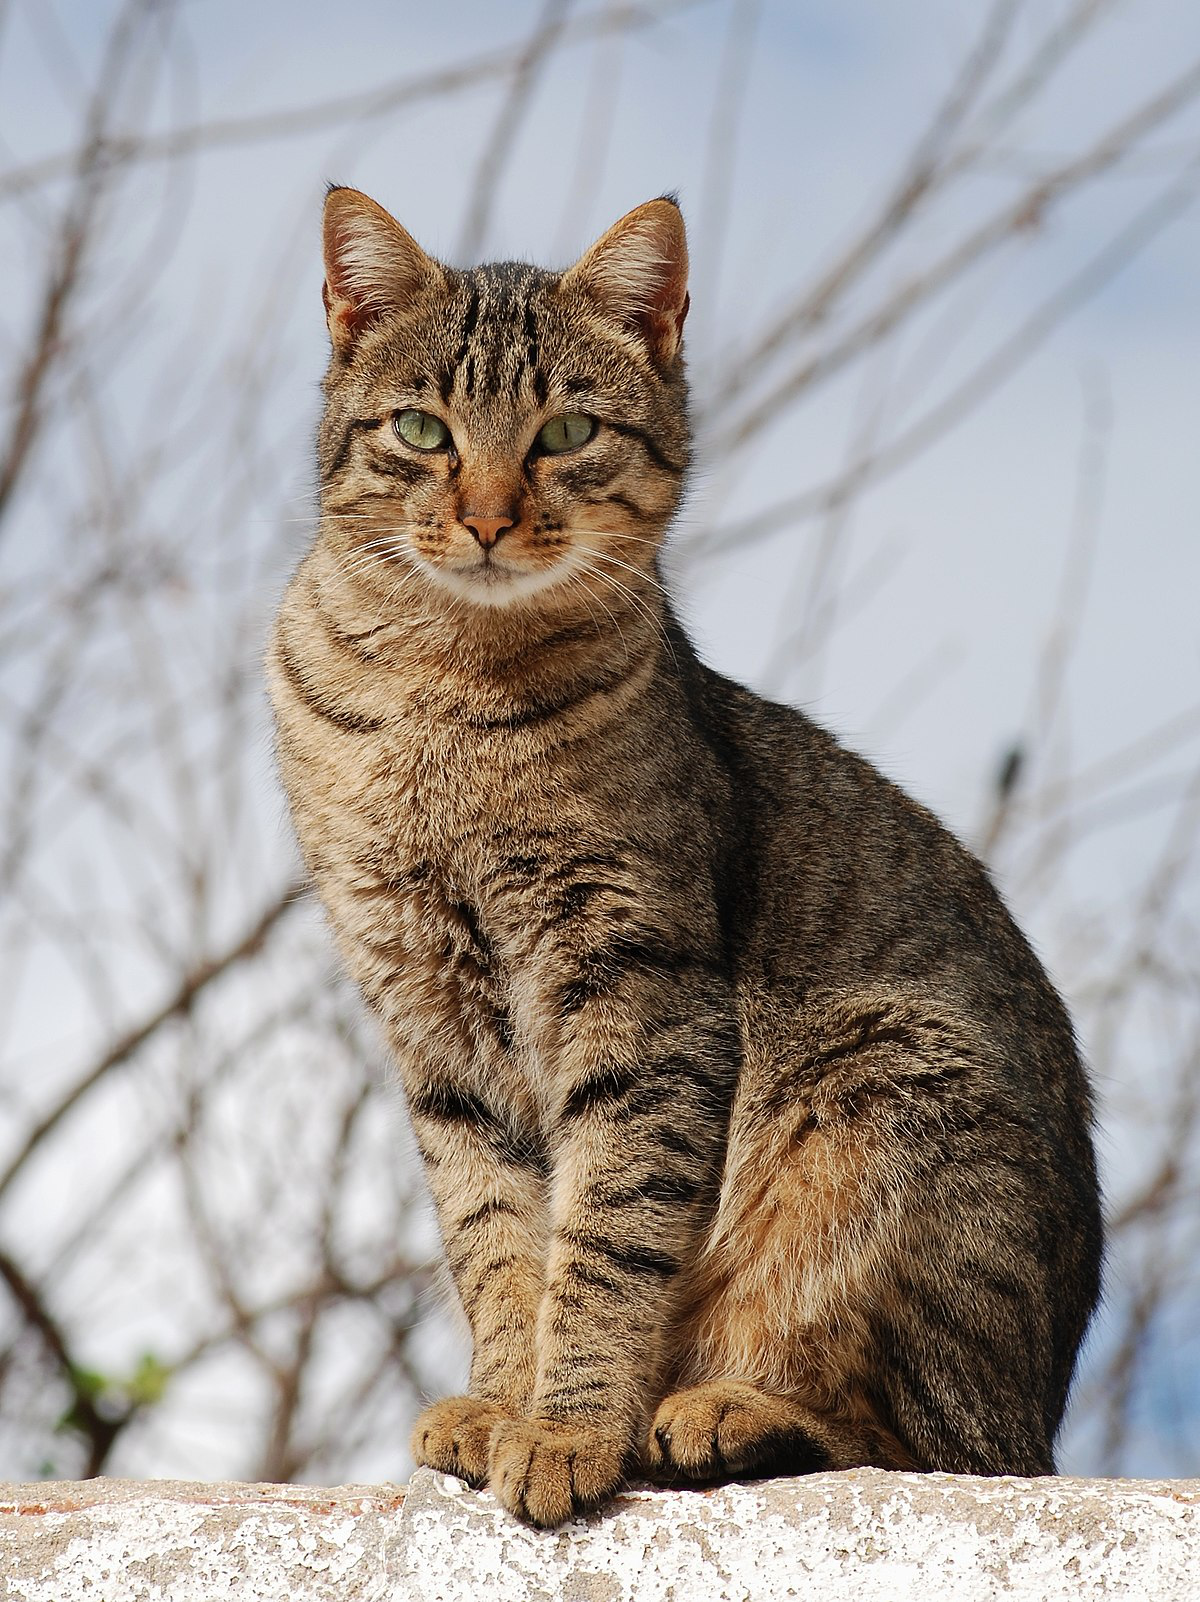

cat


In [10]:
classify(model, img_transforms, '/content/cat.jpg', classes)

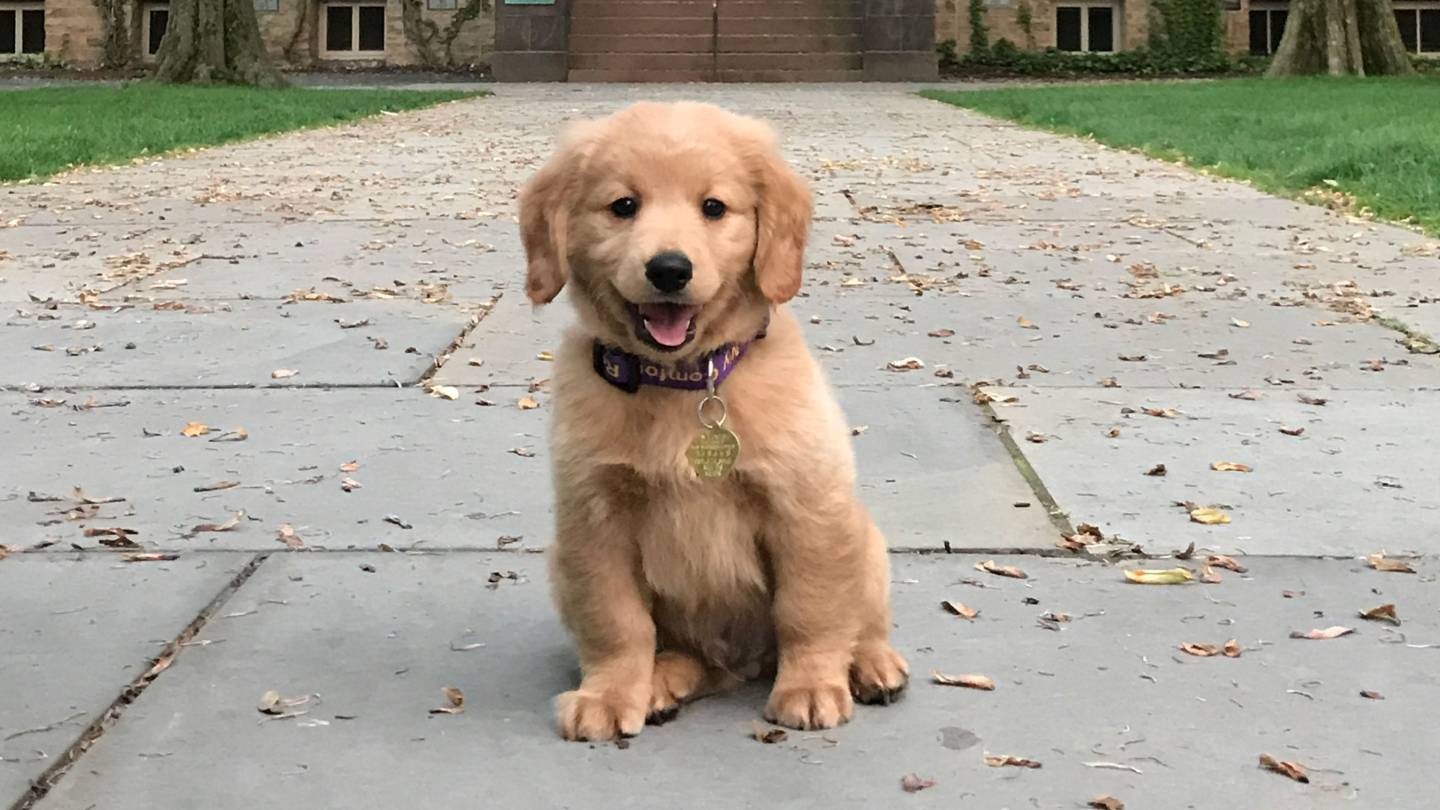

dog


In [11]:
classify(model, img_transforms, '/content/dog.jpg', classes)

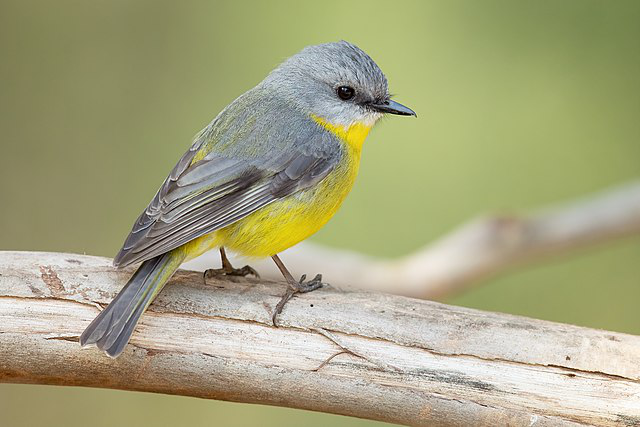

bird


In [12]:
classify(model, img_transforms, '/content/bird.jpg', classes)